In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random

Matplotlib is building the font cache; this may take a moment.


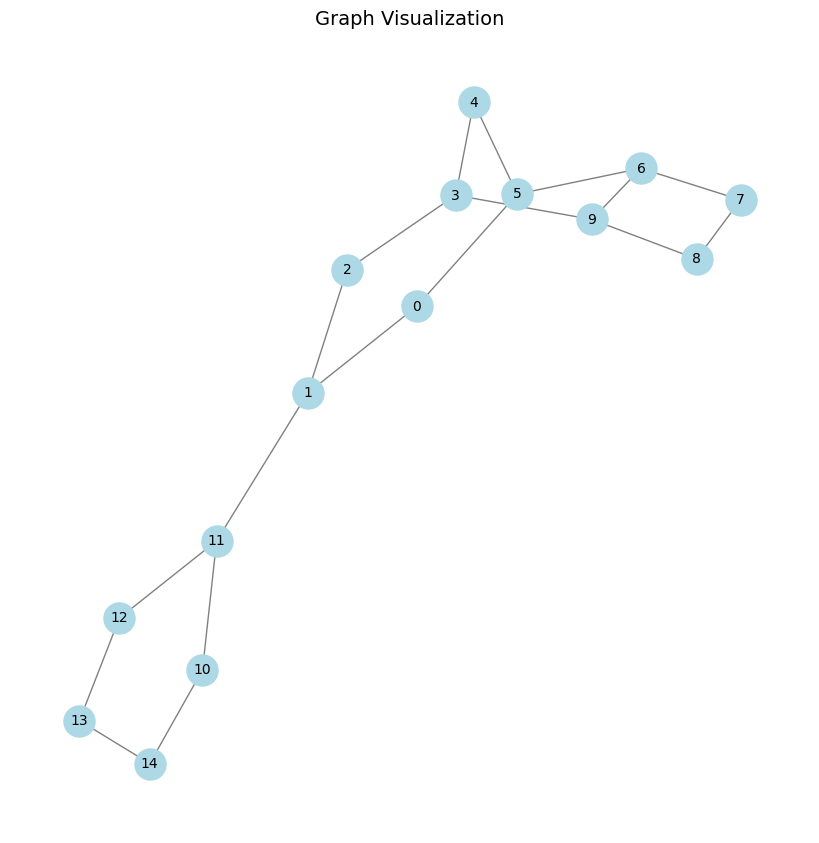

In [3]:
# Create a simple graph with 15 nodes and some edges connecting them
edges = [
    (0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 0),
    (6, 7), (7, 8), (8, 9), (9, 6), (3, 9), (5, 6),
    (10, 11), (11, 12), (12, 13), (13, 14), (14, 10), (1, 11)]

# Create the graph and add the edges
graph = nx.Graph()
graph.add_edges_from(edges)

# Improve the visualization with a layout and better styling
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(graph, seed=42)  # Use a seed for consistent layout

# Draw the graph with additional details
nx.draw(
    graph, pos, with_labels=True, node_color='lightblue',
    node_size=500, font_size=10, font_color='black', edge_color='gray'
)

# Show the graph
plt.title("Graph Visualization", fontsize=14)
plt.show()

In [37]:
# Step 1: Initialize each node in its own community
communities = {node: node for node in graph.nodes()}


# Step 2: Define a function to calculate modularity gain
def modularity_gain(graph, communities, node, target_community):
    internal_edges = sum(1 for neighbor in graph.neighbors(node) if communities[neighbor] == target_community)
    return internal_edges

selected_node = 1
# Step 3: Iteratively move nodes to maximize modularity
for _ in range(2):  # Arbitrary number of iterations
    nodes = list(graph.nodes())
    random.shuffle(nodes)
    for i, node in enumerate(nodes, 1):
        if i == selected_node:
            best_community = communities[node]
            max_gain = 0
            for neighbor in graph.neighbors(node):
                print(f"Processing shuffled element at index {i} node {node}: and it's neighbors {neighbor}")
                target_community = communities[neighbor]
                gain = modularity_gain(graph, communities, node, target_community)
                if gain > max_gain:
                    best_community = target_community
                    print(f"Changing community of node {node} from {communities[node]} to {best_community}")
                    max_gain = gain
            communities[node] = best_community
            break

        # print(i)
        # best_community = communities[node]
        # max_gain = 0
        # for neighbor in graph.neighbors(node):
        #     target_community = communities[neighbor]
        #     gain = modularity_gain(graph, communities, node, target_community)
        #     if gain > max_gain:
        #             print(f"For node {node} and it's neighbor {neighbor}, modularity gain: {gain}")
        #             best_community = target_community
        #             print(f"Changing community of node {node} from {communities[node]} to {best_community}")
        #             max_gain = gain
        #     communities[node] = best_community


# # Assign colors based on the community each node belongs to
# unique_communities = list(set(communities.values()))
# color_map = {community: i for i, community in enumerate(unique_communities)}
# node_colors = [color_map[communities[node]] for node in graph.nodes()]

# # Draw the graph with communities highlighted
# plt.figure(figsize=(8, 8))
# pos = nx.spring_layout(graph, seed=42)
# nx.draw(
#     graph, pos, with_labels=True, node_color=node_colors, 
#     node_size=500, font_size=10, font_color='black', 
#     edge_color='gray', cmap=plt.cm.get_cmap('viridis', len(unique_communities))
# )

# # Title and display the graph
# plt.title("Graph with Community Detection", fontsize=14)
# plt.show()

Processing shuffled element at index 1 node 1: and it's neighbors 0
Changing community of node 1 from 1 to 0
Processing shuffled element at index 1 node 1: and it's neighbors 2
Processing shuffled element at index 1 node 1: and it's neighbors 11
Processing shuffled element at index 1 node 14: and it's neighbors 13
Changing community of node 14 from 14 to 13
Processing shuffled element at index 1 node 14: and it's neighbors 10
